In [7]:
from manim import *
config.background_color = BLUE_D
Circle.set_default(color=YELLOW_D, fill_opacity=1)
Square.set_default(color=YELLOW, fill_opacity=1)
Triangle.set_default(color=YELLOW_D, fill_opacity=1)

In [8]:
param = "-v WARNING -r 500,180  Example"
config.media_embed = True

In [16]:
#| label: manim-vid

class Example(Scene):
    def construct(self):
        g = Group(Square().scale(2.3), Circle().scale(1.7))
        self.add(g.shift(2*LEFT))
        self.wait()
        self.play(g.animate.shift(4*RIGHT))
        self.wait()
%manim $param


In [12]:
from manim import *
param= "-v WARNING  --progress_bar None  -r  600,300  --disable_caching Example"

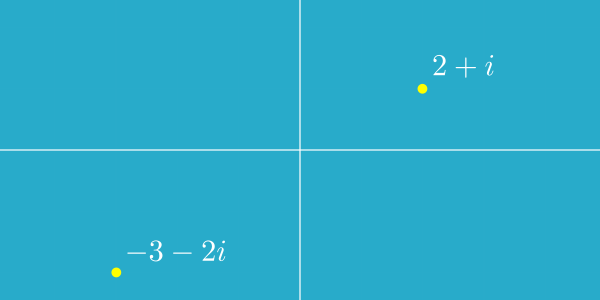

In [17]:
#| label: manim-img


class Example(ZoomedScene):
    def construct(self):
        self.camera.frame.width = 9.8
        plane = ComplexPlane()
        self.add(plane)
        d1 = Dot(plane.n2p(2 + 1j), color=YELLOW)
        d2 = Dot(plane.n2p(-3 - 2j), color=YELLOW)
        label1 = MathTex("2+i").next_to(d1, UR, 0.1)
        label2 = MathTex("-3-2i").next_to(d2, UR, 0.1)
        self.add(
            d1,
            label1,
            d2,
            label2,
        )

%manim $param

In [1]:
%%time
import matplotlib.pyplot as plt
plt.plot([1,2], [10,20], c = "orange")
#| label: my-plot